# General Information
>
>Author: Lucas Lobianco De Matheo
>
>Title: **Exploratory Data Analysis - DataSUS - COVID-19 - Brazil 2020**
>
>This dataset was obtained from the SUS website - Brazilian Unified Health System. These are SUS records on COVI-19 in  
> Brazilian's territory hospitals.
>
>Extension: .csv
>
>Source: https://opendatasus.saude.gov.br/dataset/srag-2020  
> the file in the link above was dowloaded on 2023-03-20.  
> The data obtained is in .csv format and updates can be obtained from the website:  
> - https://covid.saude.gov.br/  
> - https://dados.gov.br/dataset/notificacao_covid
>
>Date: 2023-04-04
>
> **Main Skills of this project:** 
> - **Data Preparation**
> - **Data Cleansing**  
> - **Data Wrangling**  
> - APIs for Geolocation
> - Data Visualization

# Objective: 
> Observe data patterns and behavior,  
> search for other anomalies, and  
> go deep in cleaning

# Importing main Librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

import datetime
from datetime import datetime

# Importing Data
- The folowing csv file can be found on my github page: https://github.com/LucasDeMatheo/COVID_19_DATASUS

In [2]:
#os.listdir()
os.chdir("preprocessed_data")

In [3]:
df = pd.read_csv(r'DataSUS_PreProcessed_2.csv', sep=';')
n_tuples = df.shape[0] 
df.shape

(1200795, 54)

## Selecting Date columns to trasform types

In [4]:
selected_columns = ['Notification_Date', 'First_Symptom_Date', 'Birth_Date', 'Admission_Date', 'Intubation_Date',
                    'ICU_Discharge_Date', 'Sample_Date', 'Evolution_Date', 'Hospital_Discharge_Date', 'PCR_Date']

for target in selected_columns:
    df[target] = pd.to_datetime(df[target], format = '%Y/%m/%d')
    print(f'{target}: ok')

Notification_Date: ok
First_Symptom_Date: ok
Birth_Date: ok
Admission_Date: ok
Intubation_Date: ok
ICU_Discharge_Date: ok
Sample_Date: ok
Evolution_Date: ok
Hospital_Discharge_Date: ok
PCR_Date: ok


## A firs look at the data and there types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200795 entries, 0 to 1200794
Data columns (total 54 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Notification_Date        1200795 non-null  datetime64[ns]
 1   First_Symptom_Date       1200795 non-null  datetime64[ns]
 2   State                    1200795 non-null  object        
 3   County_ID                1200795 non-null  object        
 4   Health_Unit              1200795 non-null  object        
 5   Gender                   1200795 non-null  object        
 6   Birth_Date               1198667 non-null  datetime64[ns]
 7   Pregnancy                1200795 non-null  object        
 8   Race                     1200795 non-null  object        
 9   Schooling                1200795 non-null  object        
 10  Poultry_Swine            1200795 non-null  object        
 11  Fever                    1200795 non-null  object        
 12  

> **First considerations:**  
>
> Notification_Date | First_Symptom_Date | Birth_Date | Admission_Date | Intubation_Date' | 'ICU_Discharge_Date' |   Sample_Date | PCR_Date | Evolution_Date |  Hospital_Discharge_Date  
**Are all date types and consequently time parameters**   
>
> State | County_ID | Health_Unit   
**Are geolocation parameters**
>
> Gender | Birth_Date (AGE) | Race | Schooling  
**Are Sociodemographic parameters**  
>
> Fever | Cough | Sore_Throat | Dyspnea | Respiratory_Discomfort | Saturation | Diarrhea | Vomiting | Other_Symptoms  
**Are Symptoms parameters**
>
> Pregnancy | Poultry_Swine | Postpartum | Risk_Factors | Heart_Disease | Hematology | Down_Syndrome | Liver_Disease | Asthma | Diabetes | Neuropathies | Lung_Disease | Immunosuppression | Kidney_Disease | Obesity | Other_Morbidities  
**Are Risk Factors parameters**  
>
> Vaccine | Antiviral | Antiviral_Type  
**Are associated conditions parameters**  
>
> ICU | Intubation_Date | ICU_Discharge_Date | Ventilatory_Support | **Evolution** | Evolution_Date | Hospital_Discharge_Date | Hospitalized    
**Are evolution related parameters**  
>
> X_Ray_Result | X_Ray_Date | Sample | Sample_Date | Sample_Type | Criterion | **PCR_Result** | PCR_Date  
**Are Testing and Diagnostic related parameters**  
*OBS: The time between PCR_date and Fist symptoms date must be investigated  
>
> **Outcome Attributes**: PCR_Result | Evolution  




**Primeiras considerações:**

>Data de Notificação | Data do Primeiro Sintoma | Data de Nascimento | Data de Admissão | Data de Intubação | Data de Alta da UTI | Data da Amostra | Data do PCR | Data da Evolução | Data de Alta Hospitalar  
**São todos tipos de dados de data e, consequentemente, parâmetros temporais.**

>Estado | ID do Município | Unidade de Saúde  
**São parâmetros de geolocalização.**

>Gênero | Data de Nascimento (IDADE) | Raça | Escolaridade  
**São parâmetros sociodemográficos.**

>Febre | Tosse | Dor de Garganta | Dispneia | Desconforto Respiratório | Saturação | Diarreia | Vômito | Outros Sintomas  
**São parâmetros de sintomas.**  

>Gravidez | Contato com Aves/Suínos | Período Pós-parto | Fatores de Risco | Doença Cardíaca | Hematologia | Síndrome de Down | Doença Hepática | Asma | Diabetes | Neuropatias | Doença Pulmonar | Imunossupressão | Doença Renal | Obesidade | Outras Comorbidades  
**São parâmetros de fatores de risco.**  

>Vacina | Antiviral | Tipo de Antiviral  
**São parâmetros relacionados a condições associadas de profilaxia.**  

>UTI | Data de Intubação | Data de Alta da UTI | Suporte Ventilatório | Evolução | Data da Evolução | Data de Alta Hospitalar | Hospitalizado  
**São parâmetros relacionados à evolução do quadro clínico.**  

>Resultado de Raio-X | Data do Raio-X | Amostra | Data da Amostra | Tipo de Amostra | Critério | Resultado do PCR | Data do PCR  
**São parâmetros relacionados a testes e diagnósticos.**  
***OBS: O intervalo entre a data do PCR e a data do primeiro sintoma deve ser investigado.***  

>**Atributos de Desfecho**: Resultado do PCR | Evolução.

# Filtering the useful lines 
> It is understood that it is not worth to enter data that do not form a diagnosis or an outcome,  
as well as it is not worth to have data from patients who did not undergo the RT-PCR test.

In [6]:
var1 = 'Detectable'
var2 = 'Not Detectable'
df = df.query('PCR_Result == @var1 or PCR_Result == @var2')

var1 = 'Cure'
var2 = 'Death'
df = df.query('Evolution == @var1 or Evolution == @var2')

var1 = 'Naso-oropharynx secretion'
var2 = 'Brocho-alveolar lavage'
var3 = 'CSF - cerebrospinal fluid'
df = df.query('Sample_Type == @var1 or Sample_Type == @var2 or Sample_Type == @var3')

In [7]:
n_tuples_2 = df.shape[0]
print(n_tuples_2)
print(f'{n_tuples - n_tuples_2} rejected')

826900
373895 rejected


> 373.895 lines rejected  
> 826.900 lines left  
> **Unfortunately this is a national public data standard, lots of missing or even wrong content**

# Looking for low variability values

In [8]:
# Excluding the timestamps (only for that analysis)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() # label_encoder object

df_ = df.copy()

for v in df.columns:
    if isinstance(df[v][0], (datetime.datetime, datetime.date)):
        df_ = df_.drop(v, axis=1)
        print(f'{v} was dropped')
    else:
        df_[v]= label_encoder.fit_transform(df_[v]) #Encode labels in column.         

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [9]:
# An unexpected error at the datetime.datetime function forced this alternative path
df_ = df.copy()
df_.drop('Notification_Date', axis=1, inplace=True) 
df_.drop('First_Symptom_Date', axis=1, inplace=True) 
df_.drop('Birth_Date', axis=1, inplace=True) 
df_.drop('Admission_Date', axis=1, inplace=True) 
df_.drop('Intubation_Date', axis=1, inplace=True) 
df_.drop('ICU_Discharge_Date', axis=1, inplace=True) 
df_.drop('Sample_Date', axis=1, inplace=True) 
df_.drop('Evolution_Date', axis=1, inplace=True) 
df_.drop('Hospital_Discharge_Date', axis=1, inplace=True) 
df_.drop('PCR_Date', axis=1, inplace=True) 

for v in df_.columns:
    df_[v]= label_encoder.fit_transform(df_[v]) #Encode labels in column. 

In [10]:
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0.0)
var_thres = var_thres.fit(df_)

constant_columns = [column for column in df_.columns
                   if column not in df_.columns[var_thres.get_support()]]
print(f'Number of match columns: {len(constant_columns)} \n-->')

for feature in constant_columns:
    print(feature)
print('--'*15)

Number of match columns: 1 
-->
Sample
------------------------------


In [11]:
df['Sample'].unique()

array(['1'], dtype=object)

> It makes sense that this variable does not have variability, since only those who were tested (1) were selected.

In [12]:
var_thres = VarianceThreshold(threshold=0.1)
var_thres = var_thres.fit(df_)

constant_columns = [column for column in df_.columns
                   if column not in df_.columns[var_thres.get_support()]]
print(f'Number of match columns: {len(constant_columns)} \n-->')

for feature in constant_columns:
    print(feature)
print('--'*15)

Number of match columns: 3 
-->
Hospitalized
Sample
Sample_Type
------------------------------


In [13]:
df['Sample_Type'].unique()

array(['Naso-oropharynx secretion', 'Brocho-alveolar lavage',
       'CSF - cerebrospinal fluid'], dtype=object)

In [14]:
print(f'Total: {df.shape[0]}')
print(f'Naso-oropharynx secretion: {df.Sample_Type[df.Sample_Type == "Naso-oropharynx secretion"].count()}')
print(f'Brocho-alveolar lavage: {df.Sample_Type[df.Sample_Type == "Brocho-alveolar lavage"].count()}')
print(f'CSF - cerebrospinal fluid: {df.Sample_Type[df.Sample_Type == "CSF - cerebrospinal fluid"].count()}')

Total: 826900
Naso-oropharynx secretion: 821749
Brocho-alveolar lavage: 5108
CSF - cerebrospinal fluid: 43


In [15]:
df['Hospitalized'].unique()

array(['1', '0', 'Ignored'], dtype=object)

In [16]:
print(f'Total: {df.shape[0]}')
print(f'Yes: {df.Hospitalized[df.Hospitalized == "1"].count()}')
print(f'No: {df.Hospitalized[df.Hospitalized == "0"].count()}')
print(f'Ignored: {df.Hospitalized[df.Hospitalized == "Ignored"].count()}')

Total: 826900
Yes: 792146
No: 20754
Ignored: 14000


> The vast majority of tests are Naso-oropharynx secretion tests.  
> Hospitalized will be further investigated, even thoung there is a majority of samples from hospitalization

In [17]:
var_thres = VarianceThreshold(threshold=0.2)
var_thres = var_thres.fit(df_)

constant_columns = [column for column in df_.columns
                   if column not in df_.columns[var_thres.get_support()]]
print(f'Number of match columns: {len(constant_columns)} \n-->')

for feature in constant_columns:
    print(feature)
print('--'*15)

Number of match columns: 4 
-->
Antiviral_Type
Hospitalized
Sample
Sample_Type
------------------------------


In [18]:
df['Antiviral_Type'].unique()

array(['Ignored', '1', '0'], dtype=object)

In [19]:
print(f'Total: {df.shape[0]}')
print(f'Yes: {df.Antiviral_Type[df.Antiviral_Type == "1"].count()}')
print(f'No: {df.Antiviral_Type[df.Antiviral_Type == "0"].count()}')
print(f'Ignored: {df.Antiviral_Type[df.Antiviral_Type == "Ignored"].count()}')

Total: 826900
Yes: 127223
No: 830
Ignored: 698847


> Antiviral Type must be investigated

In [20]:
var_thres = VarianceThreshold(threshold=0.3)
var_thres = var_thres.fit(df_)

constant_columns = [column for column in df_.columns
                   if column not in df_.columns[var_thres.get_support()]]
print(f'Number of match columns: {len(constant_columns)} \n-->')

for feature in constant_columns:
    print(feature)
print('--'*15)

Number of match columns: 8 
-->
Poultry_Swine
Risk_Factors
Antiviral_Type
Hospitalized
Sample
Sample_Type
PCR_Result
Evolution
------------------------------


In [21]:
df['PCR_Result'].unique()

array(['Detectable', 'Not Detectable'], dtype=object)

In [22]:
print(f'Total: {df.shape[0]}')
print(f'Detectable: {df.PCR_Result[df.PCR_Result == "Detectable"].count()}')
print(f'Not Detectable: {df.PCR_Result[df.PCR_Result == "Not Detectable"].count()}')

Total: 826900
Detectable: 484320
Not Detectable: 342580


In [23]:
df['Evolution'].unique()

array(['Cure', 'Death'], dtype=object)

In [24]:
print(f'Total: {df.shape[0]}')
print(f'Cure: {df.Evolution[df.Evolution == "Cure"].count()}')
print(f'Death: {df.Evolution[df.Evolution == "Death"].count()}')

Total: 826900
Cure: 590985
Death: 235915


> Poultry Swine will be investigated  
> The Risk Factor variable summarizes the existence or not of risk factors, but there are the main risk factors detailed in the df. 

In [25]:
df.drop('Sample', axis=1, inplace=True)
df.drop('Sample_Type', axis=1, inplace=True)
df.drop('Hospitalized', axis=1, inplace=True)

# Checking for important missing data

In [26]:
(df.isnull().sum()/df.shape[0])*100

Notification_Date           0.000000
First_Symptom_Date          0.000000
State                       0.000000
County_ID                   0.000000
Health_Unit                 0.000000
Gender                      0.000000
Birth_Date                  0.122748
Pregnancy                   0.000000
Race                        0.000000
Schooling                   0.000000
Poultry_Swine               0.000000
Fever                       0.000000
Cough                       0.000000
Sore_Throat                 0.000000
Dyspnea                     0.000000
Respiratory_Discomfort      0.000000
Saturation                  0.000000
Diarrhea                    0.000000
Vomiting                    0.000000
Other_Symptoms              0.000000
Postpartum                  0.000000
Risk_Factors                0.000000
Heart_Disease               0.000000
Hematology                  0.000000
Down_Syndrome               0.000000
Liver_Disease               0.000000
Asthma                      0.000000
D

In [27]:
df[df['Intubation_Date'].isnull() == True];

In [28]:
df[df['Evolution_Date'].isnull() == True];

# Calculating Age 

In [29]:
df['Age'] = df['Notification_Date'].dt.year - df['Birth_Date'].dt.year

df.drop('Birth_Date', axis=1, inplace=True) 

df = df.dropna(subset=['Age'], how='any')

n_tuples_3 = df.shape[0]
print(n_tuples_3)
print(f'{n_tuples_2 - n_tuples_3} rejected')

825885
1015 rejected


## Analysing Age

In [30]:
from scipy.stats import skew

print(df.Age.max())
print(df.Age.min())
print(df.Age.mean())
print(df.Age.std())
print(skew(df['Age']))

122.0
0.0
57.2949744819194
22.742659281958566
-0.6915203741719252


> A 100 year limit will be imposed on the df

In [31]:
var1 = 100
df = df.query('Age < @var1')

n_tuples_4 = df.shape[0]
print(n_tuples_4)
print(f'{n_tuples_3 - n_tuples_4} rejected')

824231
1654 rejected


# Calculating Time Period of the Outbreak
> Variables used: Notification_Date (no missing values)

In [32]:
print(df['Notification_Date'].max())
print(df['Notification_Date'].min())

2023-02-27 00:00:00
2019-12-29 00:00:00


In [33]:
time_period = []

for v in df['Notification_Date']:
    if v < datetime.strptime('2020-03-29','%Y-%m-%d'):
        time_period.append(1)
    elif v < datetime.strptime('2020-06-29','%Y-%m-%d'):
        time_period.append(2)
    elif v < datetime.strptime('2020-09-29','%Y-%m-%d'):
        time_period.append(3)
    elif v < datetime.strptime('2020-12-29','%Y-%m-%d'):
        time_period.append(4)
    elif v < datetime.strptime('2021-03-29','%Y-%m-%d'):
        time_period.append(5)
    elif v < datetime.strptime('2021-06-29','%Y-%m-%d'):
        time_period.append(6)
    elif v < datetime.strptime('2021-09-29','%Y-%m-%d'):
        time_period.append(7)
    elif v < datetime.strptime('2021-12-29','%Y-%m-%d'):
        time_period.append(8)
    elif v < datetime.strptime('2022-03-29','%Y-%m-%d'):
        time_period.append(9)
    elif v < datetime.strptime('2022-06-29','%Y-%m-%d'):
        time_period.append(10)
    elif v < datetime.strptime('2022-09-29','%Y-%m-%d'):
        time_period.append(11)
    elif v < datetime.strptime('2022-12-29','%Y-%m-%d'):
        time_period.append(12)
    elif v < datetime.strptime('2023-03-29','%Y-%m-%d'):
        time_period.append(12)
    else:
        time_period.append[0]
        
df['Outbreak_Period'] = time_period                                 

In [137]:
# Calcular a contagem de surtos por período
outbreak_count = df.groupby(['Outbreak_Period']).size().reset_index(name='Outbreak_Count')

# Merge dos dados originais com a contagem de surtos
df = df.merge(outbreak_count, on='Outbreak_Period')

section = df.groupby(['Outbreak_Period', 'PCR_Result']).count()
section = pd.DataFrame(section['Outbreak_Count'])
section = section.reset_index()
section;

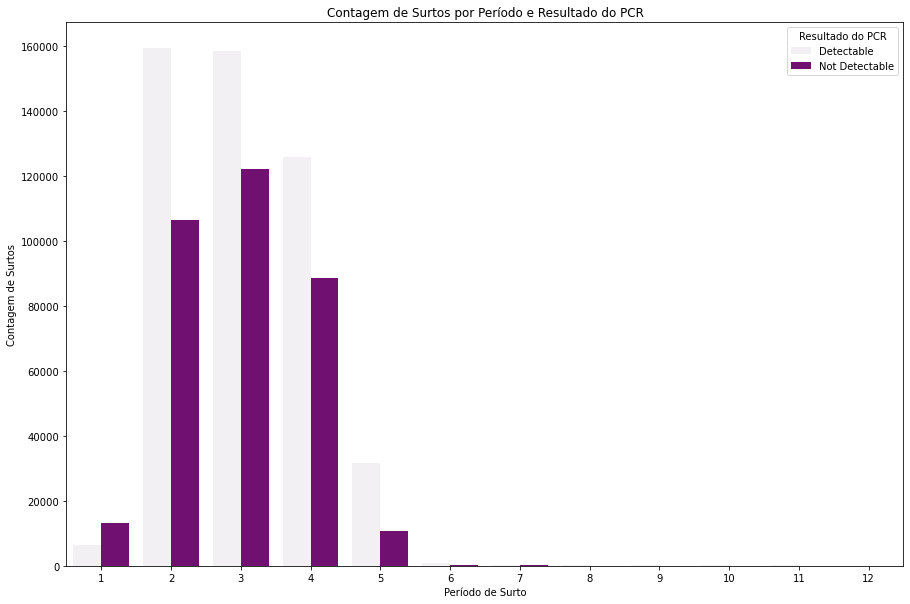

In [35]:
plt.figure(figsize = (15,10))
sns.barplot(x='Outbreak_Period', y='Outbreak_Count', hue='PCR_Result', data=section, order=None, hue_order=None, 
                ci=None, n_boot=1000, units=None, seed=None, orient=None, color='Purple', palette=None, 
                saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None)

plt.title('Contagem de Surtos por Período e Resultado do PCR')
plt.xlabel('Período de Surto')
plt.ylabel('Contagem de Surtos')
plt.legend(title='Resultado do PCR')

plt.show()

> The majority of cases are related to the beginning of the pandemic 2020-12-29

# PCR result and Symptoms Start Date

In [138]:
df['TimeDelta_PCR'] = df['PCR_Date'] - df['First_Symptom_Date']
df['TimeDelta_PCR'] = df['TimeDelta_PCR'].dt.days

In [139]:
df_ = df.dropna(subset=['TimeDelta_PCR'], how='any')

In [140]:
print(df.TimeDelta_PCR.max())
print(df.TimeDelta_PCR.min())
print(df.TimeDelta_PCR.mean())
print(df.TimeDelta_PCR.std())
print(skew(df_['TimeDelta_PCR']))
print(df['TimeDelta_PCR'].isnull().sum())

898.0
0.0
10.06221526437786
15.963586634480567
20.07242367598851
221


### Removing Outliers

In [141]:
mean = df.TimeDelta_PCR.mean( )
std = df.TimeDelta_PCR.std( )
valor_inf = mean - 3 * std
valor_sup = mean + 3  * std
df = df[(df.TimeDelta_PCR < valor_sup) & (df.TimeDelta_PCR > valor_inf)]

In [142]:
n_tuples_5 = df.shape[0]
print(n_tuples_5)
print(f'{n_tuples_4 - n_tuples_5} rejected')

818651
5580 rejected


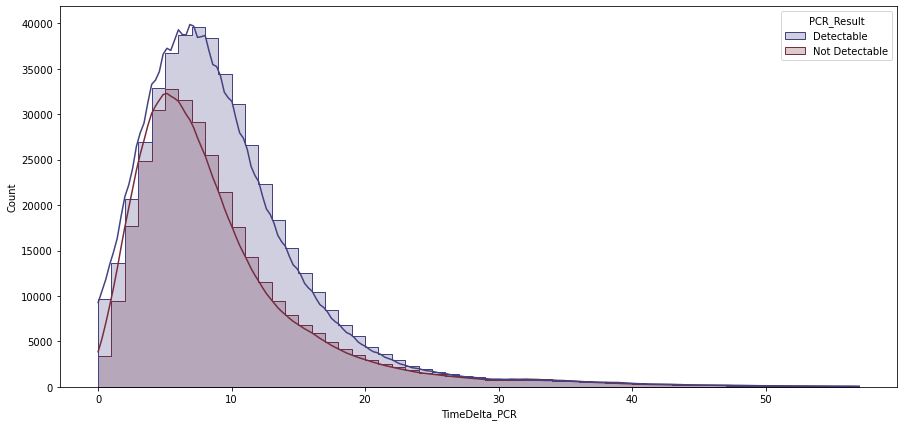

In [41]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
#plt.figure(figsize = (15,7))
fig, ax = plt.subplots(figsize = (15,7))
sns.histplot(data=df, x=df['TimeDelta_PCR'], y=None, hue='PCR_Result', weights=None,
                 stat='count', bins=101, binwidth=1, binrange=None,
                 discrete=None, cumulative=False, common_bins=True, common_norm=True,
                 multiple='layer', element='step', fill=True, shrink=1, kde=True, kde_kws=None, 
                 line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None,
                 cbar_kws=None, palette='icefire', hue_order=None, hue_norm=None, color= None, 
                 log_scale=None, legend=True, ax=ax)
#ax.set_xlim(70, 700)
#ax.set_ylim(0, 20)
#ax.set_xlim(0, 40)


plt.show()
# element{“bars”, “step”, “poly”}
# multiple{“layer”, “dodge”, “stack”, “fill”}
# palette{husl, Set2, Paired, rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, icefire}

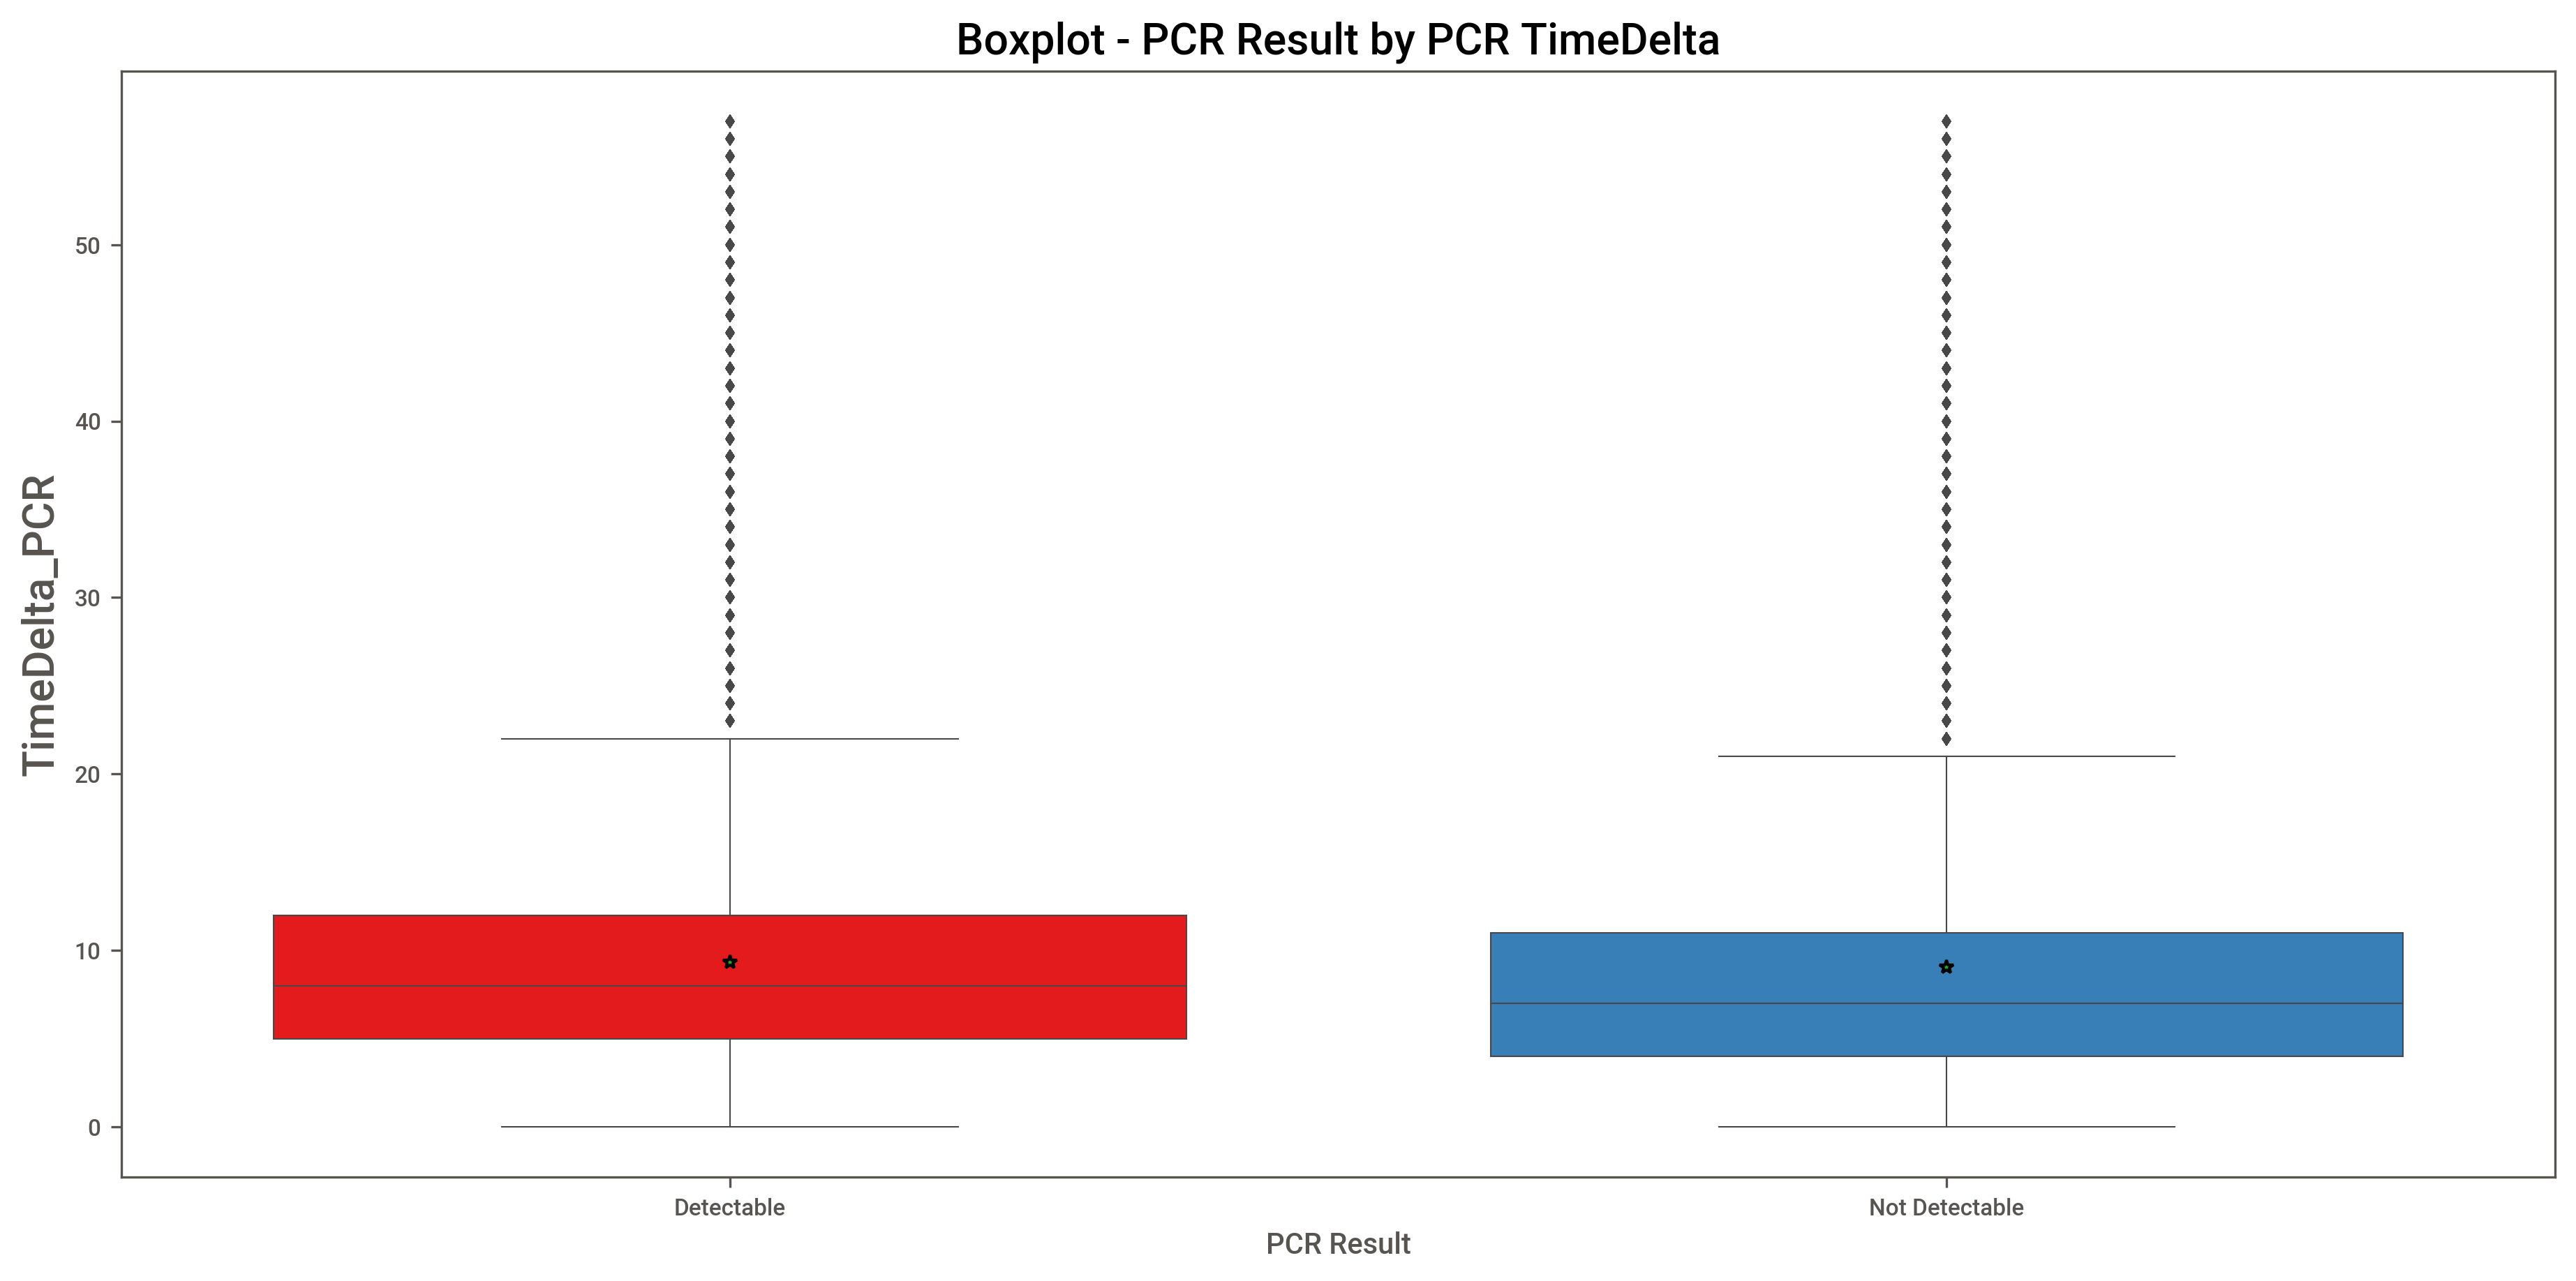

In [143]:
#plt.figure(num=None, figsize=(15,10), dpi=300, facecolor=None, edgecolor= None, frameon=False, clear=False)
fig, ax = plt.subplots(figsize = (15,7), dpi=300, facecolor=None, edgecolor= None, frameon=False, clear=False)
sns.boxplot(x='PCR_Result', y='TimeDelta_PCR', hue=None, data=df, order=None,
            hue_order=None, orient='v', color=None, palette='Set1',
            saturation=0.99, width=0.75, dodge=True, fliersize=2, 
            linewidth=0.5, whis=1.5, ax=None, showmeans=True, meanprops={"marker": "*", "markeredgecolor": "black", "markersize": "5"})

#ax.set_xlim(70, 700)
#ax.set_ylim(0, 30)

plt.title('Boxplot - PCR Result by PCR TimeDelta', fontsize = 15, fontweight = 'bold')
plt.xlabel('PCR Result')
plt.ylabel('TimeDelta_PCR', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.box = False


In [144]:
df_negative = df.loc[(df['PCR_Result'] == 'Not Detectable')] # creating a dataset with only the negatives
df_positive = df.loc[(df['PCR_Result'] == 'Detectable')] # creating a dataset with only the positives 

groups_neg = df_negative.groupby('TimeDelta_PCR').TimeDelta_PCR.agg(['count'])
groups_pos = df_positive.groupby('TimeDelta_PCR').TimeDelta_PCR.agg(['count'])

groups = pd.concat([groups_pos, groups_neg], axis = 1)
group_names = ['Positives', 'Negatives']
groups.columns = group_names

diference = groups['Negatives'] - groups['Positives']
groups['Diference'] = diference

ratio = groups['Positives'] / groups['Negatives']
groups['Ratio P/N'] = ratio

groups.tail(200)

,Positives,Negatives,Diference,Ratio P/N
TimeDelta_PCR,,,,
0.0,9720,3448,-6272,2.819026
1.0,13582,9471,-4111,1.434062
2.0,20650,17671,-2979,1.168581
3.0,26895,24872,-2023,1.081336
4.0,32931,30476,-2455,1.080555
5.0,36728,32726,-4002,1.122288
6.0,38762,31534,-7228,1.229213
7.0,39636,29156,-10480,1.359446
8.0,38371,25475,-12896,1.506222


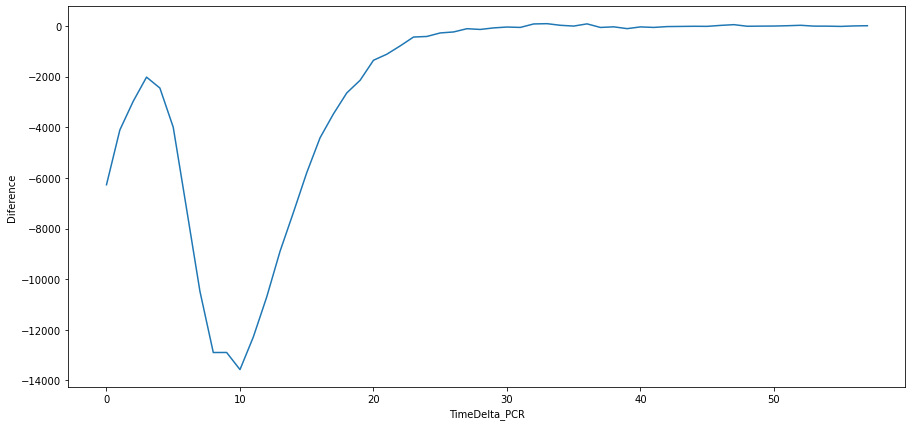

In [44]:
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.figure(figsize = (15,7))
sns.lineplot( x='TimeDelta_PCR', y='Diference', hue=None, size=None, style=None, data=groups,
             palette='icefire', hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, 
             dashes=True, markers=None, style_order=None, units=None, estimator='mean',
             ci=95, n_boot=1000, seed=None, sort=True, err_style='band',
             err_kws=None, legend='auto', ax=None)
plt.show()

## Over Criterium

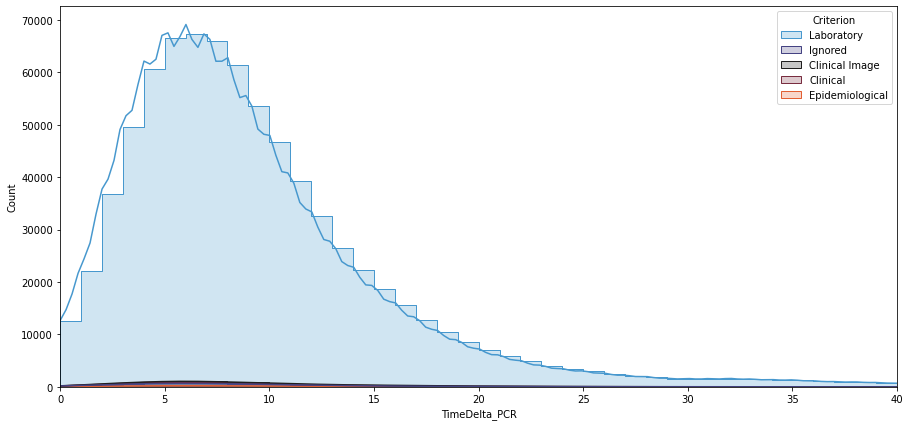

In [45]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
#plt.figure(figsize = (15,7))
fig, ax = plt.subplots(figsize = (15,7))
sns.histplot(data=df, x=df['TimeDelta_PCR'], y=None, hue='Criterion', weights=None,
                 stat='count', bins=101, binwidth=1, binrange=None,
                 discrete=None, cumulative=False, common_bins=True, common_norm=True,
                 multiple='layer', element='step', fill=True, shrink=1, kde=True, kde_kws=None, 
                 line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None,
                 cbar_kws=None, palette='icefire', hue_order=None, hue_norm=None, color= None, 
                 log_scale=None, legend=True, ax=ax)
#ax.set_xlim(70, 700)
#ax.set_ylim(0, 20)
ax.set_xlim(0, 40)


plt.show()
# element{“bars”, “step”, “poly”}
# multiple{“layer”, “dodge”, “stack”, “fill”}
# palette{husl, Set2, Paired, rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, icefire}

> Laboratorial is the main Criterion adopted

In [145]:
df['Criterion'].unique()

array(['Laboratory', 'Ignored', 'Clinical Image', 'Clinical',
       'Epidemiological'], dtype=object)

In [146]:
var1 = 'Laboratory'
df = df.query('Criterion == @var1')

n_tuples_6 = df.shape[0]
print(n_tuples_6)
print(f'{n_tuples_5 - n_tuples_6} rejected')

784435
34216 rejected


In [147]:
df.drop('Criterion', axis=1, inplace=True) # do not need it anymore

In [148]:
df.drop('X_Ray_Result', axis=1, inplace=True)
df.drop('X_Ray_Date', axis=1, inplace=True)

# Observing PCR result by Age

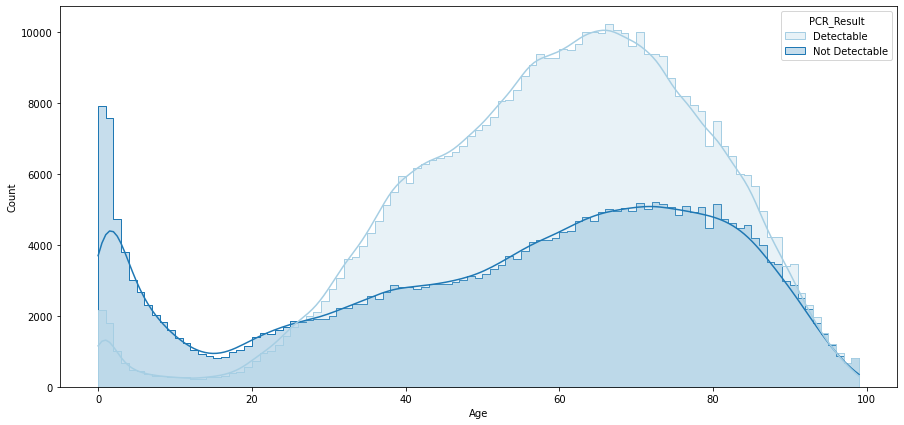

In [50]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.figure(figsize = (15,7))
sns.histplot(data=df, x=df['Age'], y=None, hue='PCR_Result', weights=None,
                 stat='count', bins=101, binwidth=1, binrange=None,
                 discrete=None, cumulative=False, common_bins=True, common_norm=True,
                 multiple='layer', element='step', fill=True, shrink=1, kde=True, kde_kws=None, 
                 line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None,
                 cbar_kws=None, palette='Paired', hue_order=None, hue_norm=None, color= None, 
                 log_scale=None, legend=True, ax=None)
plt.show()
# element{“bars”, “step”, “poly”}
# multiple{“layer”, “dodge”, “stack”, “fill”}
# palette{husl, Set2, Paired, rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, icefire}

In [149]:
from scipy.stats import skew
skew(df['Age'])

-0.701753171109699

In [150]:
df_negative = df.loc[(df['PCR_Result'] == 'Not Detectable')] # creating a dataset with only the negatives
df_positive = df.loc[(df['PCR_Result'] == 'Detectable')] # creating a dataset with only the positives  

In [151]:
print(skew(df_negative['Age']))
print(skew(df_positive['Age']))

-0.5449851484212251
-0.5217373299536474


In [152]:
groups_neg = df_negative.groupby('Age').Age.agg(['count'])
groups_pos = df_positive.groupby('Age').Age.agg(['count'])

In [153]:
groups = pd.concat([groups_pos, groups_neg], axis = 1)
group_names = ['Positives', 'Negatives']
groups.columns = group_names

diference = groups['Negatives'] - groups['Positives']
groups['Diference'] = diference

ratio = groups['Positives'] / groups['Negatives']
groups['Ratio P/N'] = ratio

groups

,Positives,Negatives,Diference,Ratio P/N
Age,,,,
0.0,2161,7907,5746,0.273302
1.0,1809,7588,5779,0.238403
2.0,1004,4721,3717,0.212667
3.0,675,3791,3116,0.178053
4.0,487,3022,2535,0.161152
...,...,...,...,...
95.0,1218,1182,-36,1.030457
96.0,956,869,-87,1.100115
97.0,662,664,2,0.996988


In [154]:
np.corrcoef(diference,np.sort(df['Age'].unique()))

array([[ 1.        , -0.49096208],
       [-0.49096208,  1.        ]])

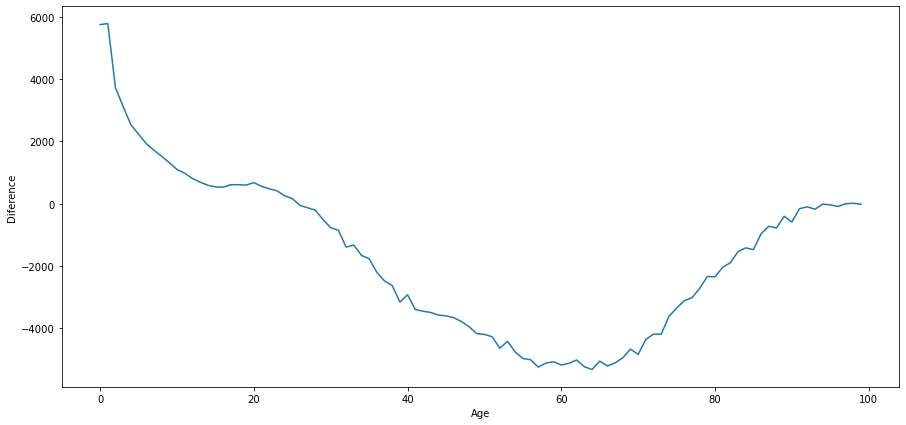

In [57]:
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.figure(figsize = (15,7))
sns.lineplot( x='Age', y='Diference', hue=None, size=None, style=None, data=groups,
             palette='icefire', hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, 
             dashes=True, markers=None, style_order=None, units=None, estimator='mean',
             ci=95, n_boot=1000, seed=None, sort=True, err_style='band',
             err_kws=None, legend='auto', ax=None)
plt.show()

# Observing PCR evolution by Age

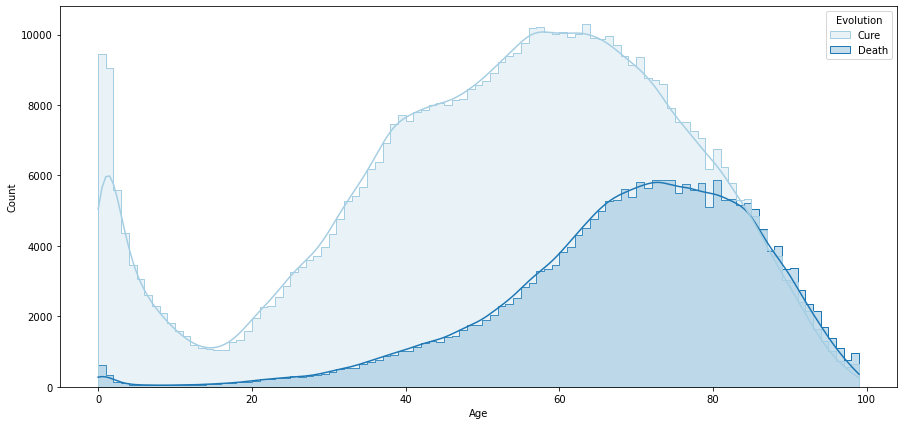

In [58]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.figure(figsize = (15,7))
sns.histplot(data=df, x=df['Age'], y=None, hue='Evolution', weights=None,
                 stat='count', bins=101, binwidth=1, binrange=None,
                 discrete=None, cumulative=False, common_bins=True, common_norm=True,
                 multiple='layer', element='step', fill=True, shrink=1, kde=True, kde_kws=None, 
                 line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None,
                 cbar_kws=None, palette='Paired', hue_order=None, hue_norm=None, color= None, 
                 log_scale=None, legend=True, ax=None)
plt.show()
# element{“bars”, “step”, “poly”}
# multiple{“layer”, “dodge”, “stack”, “fill”}
# palette{husl, Set2, Paired, rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, icefire}

In [155]:
df_negative = df.loc[(df['Evolution'] == 'Death')] # creating a dataset with only the negatives
df_positive = df.loc[(df['Evolution'] == 'Cure')] # creating a dataset with only the positives  

In [156]:
print(skew(df_negative['Age']))
print(skew(df_positive['Age']))

-0.9743850622541579
-0.5362916147129733


In [157]:
groups_neg = df_negative.groupby('Age').Age.agg(['count'])
groups_pos = df_positive.groupby('Age').Age.agg(['count'])

groups = pd.concat([groups_pos, groups_neg], axis = 1)
group_names = ['Positives', 'Negatives']
groups.columns = group_names

diference = groups['Negatives'] - groups['Positives']
groups['Diference'] = diference

ratio = groups['Positives'] / groups['Negatives']
groups['Ratio P/N'] = ratio

groups

,Positives,Negatives,Diference,Ratio P/N
Age,,,,
0.0,9441,627,-8814,15.057416
1.0,9051,346,-8705,26.158960
2.0,5579,146,-5433,38.212329
3.0,4365,101,-4264,43.217822
4.0,3459,50,-3409,69.180000
...,...,...,...,...
95.0,1018,1382,364,0.736614
96.0,736,1089,353,0.675849
97.0,554,772,218,0.717617


In [158]:
np.corrcoef(diference,np.sort(df['Age'].unique()))

array([[1.        , 0.34564899],
       [0.34564899, 1.        ]])

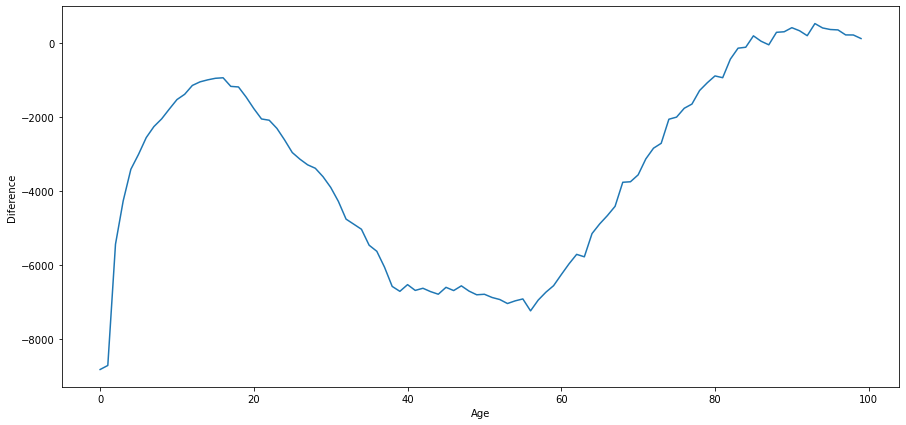

In [63]:
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.figure(figsize = (15,7))
sns.lineplot( x='Age', y='Diference', hue=None, size=None, style=None, data=groups,
             palette='icefire', hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, 
             dashes=True, markers=None, style_order=None, units=None, estimator='mean',
             ci=95, n_boot=1000, seed=None, sort=True, err_style='band',
             err_kws=None, legend='auto', ax=None)
plt.show()

# By hospital

In [159]:
df['Health_Unit'].nunique()

5473

In [160]:
df['Health_Unit'].unique()

array(['HOSPITAL MATERNO INFANTIL DR ANTONIO LISBOA',
       'HIAS HOSPITAL INFANTIL ALBERT SABIN',
       'HOSPITAL E MATERNIDADE MUNICIPAL N S DO MONTE SERRAT', ...,
       'CENTRO DE SAUDE PINHEIRA',
       'HOSPITAL MILITAR DE AREA DE CAMPO GRANDE',
       'CENTRAL DE VIGILANCIA EM SAUDE'], dtype=object)

In [161]:
lista_hospital = []

for v in df['Health_Unit']:
    if "HOSPITAL" in v:
        lista_hospital.append('1')
    elif "HOSPITALAR" in v:
        lista_hospital.append('1')
    elif "SPA" in v:
        lista_hospital.append('1')
    elif "SANTA CASA" in v:
        lista_hospital.append('1')
    elif "UPA" in v:
        lista_hospital.append('1')
    elif "UBS" in v:
        lista_hospital.append('0')
    else:
        lista_hospital.append('0')

df['Hospital'] = lista_hospital

In [162]:
print(df[df['Hospital'] == '1'].shape[0])
print(df[df['Hospital'] == '0'].shape[0])

626567
157868


In [163]:
df_negative = df.loc[(df['PCR_Result'] == 'Not Detectable')] # creating a dataset with only the negatives
df_positive = df.loc[(df['PCR_Result'] == 'Detectable')] # creating a dataset with only the positives 

groups_neg = df_negative.groupby('Hospital').TimeDelta_PCR.agg(['count'])
groups_pos = df_positive.groupby('Hospital').TimeDelta_PCR.agg(['count'])

In [164]:
groups = pd.concat([groups_pos, groups_neg], axis = 1)
group_names = ['Positives', 'Negatives']
groups.columns = group_names

diference = groups['Negatives'] - groups['Positives']
groups['Diference'] = diference

ratio = groups['Positives'] / groups['Negatives']
groups['Ratio P/N'] = ratio

groups

,Positives,Negatives,Diference,Ratio P/N
Hospital,,,,
0,96291,61577,-34714,1.563749
1,378202,248365,-129837,1.522767


> No proportional diference over Hospital and Clinics

In [165]:
df['Hospital'].count()

784435

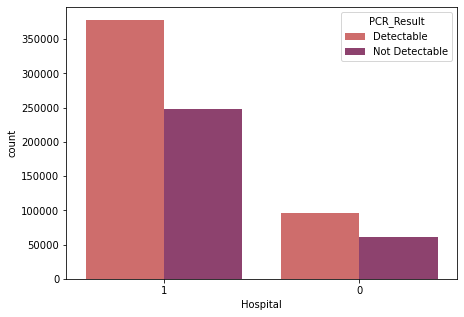

In [71]:
plt.figure(figsize = (7,5))
sns.countplot(x='Hospital', hue='PCR_Result', data = df, palette='flare')
plt.show()

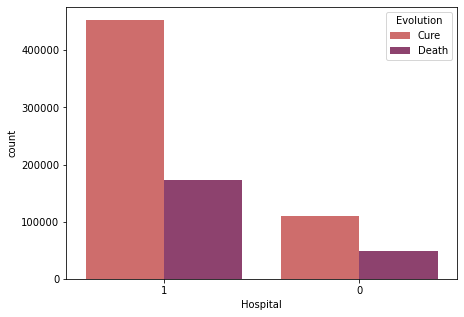

In [72]:
plt.figure(figsize = (7,5))
sns.countplot(x='Hospital', hue='Evolution', data = df, palette='flare')
plt.show()

In [166]:
df.drop('Hospital', axis=1, inplace=True)
df.drop('Health_Unit', axis=1, inplace=True)

# By State

In [167]:
df['State'].nunique()

27

In [168]:
df['State'].unique()

array(['DF', 'CE', 'SP', 'PR', 'MG', 'RJ', 'RS', 'MA', 'RO', 'BA', 'PE',
       'PI', 'ES', 'MT', 'SC', 'RN', 'PB', 'AM', 'GO', 'AL', 'MS', 'AC',
       'PA', 'SE', 'RR', 'TO', 'AP'], dtype=object)

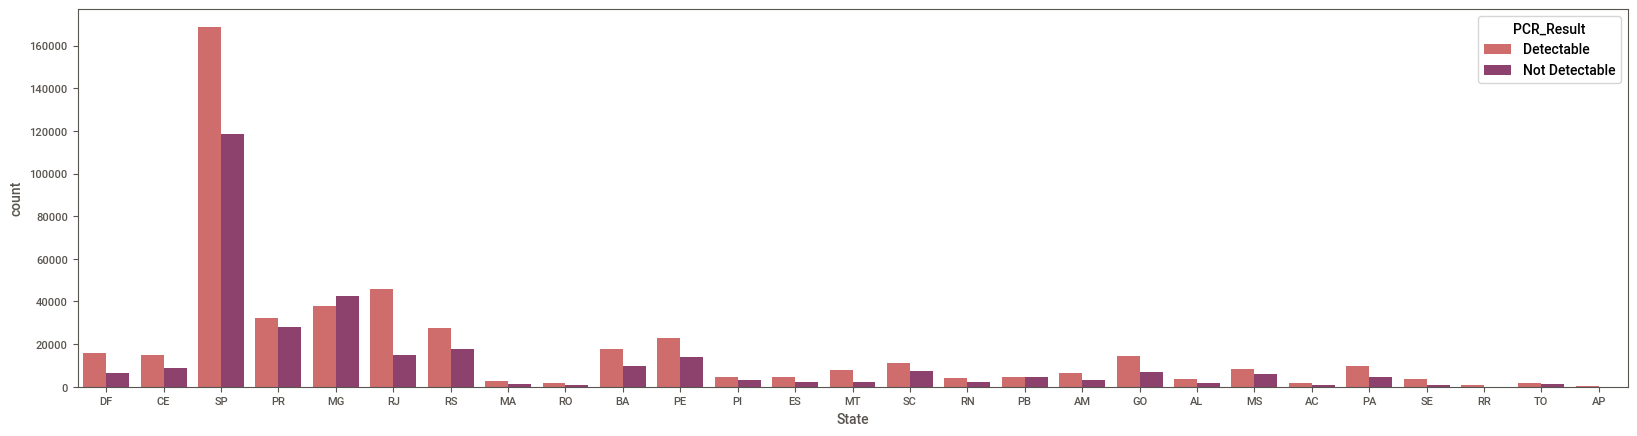

In [169]:
plt.figure(figsize = (20,5))
sns.countplot(x='State', hue='PCR_Result', data = df, palette='flare')
plt.show()

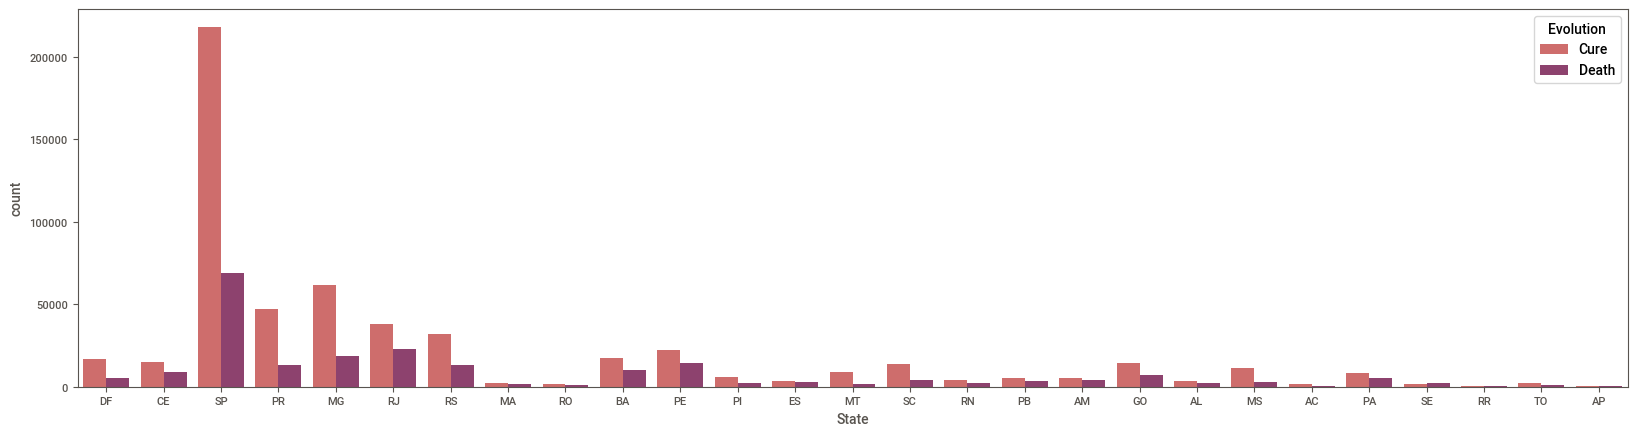

In [170]:
plt.figure(figsize = (20,5))
sns.countplot(x='State', hue='Evolution', data = df, palette='flare')
plt.show()

In [171]:
df.drop('County_ID', axis=1, inplace=True) # same as State

# By Poultry_Swine

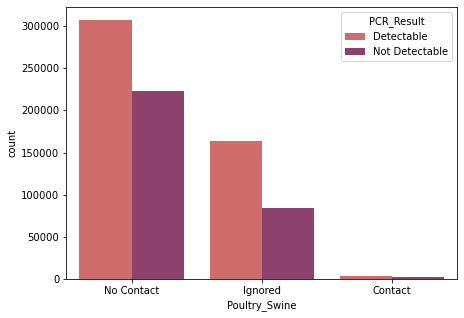

In [79]:
plt.figure(figsize = (7,5))
sns.countplot(x='Poultry_Swine', hue='PCR_Result', data = df, palette='flare')
plt.show()

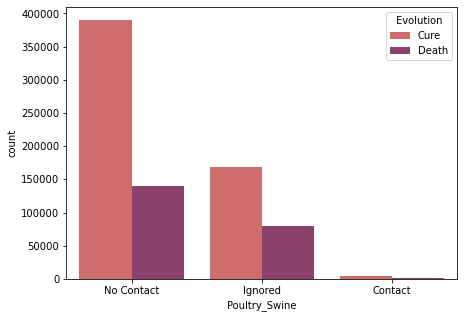

In [80]:
plt.figure(figsize = (7,5))
sns.countplot(x='Poultry_Swine', hue='Evolution', data = df, palette='flare')
plt.show()

In [172]:
df.drop('Poultry_Swine', axis=1, inplace=True)

# By Antiviral

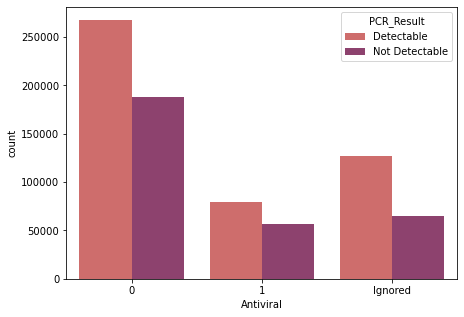

In [82]:
plt.figure(figsize = (7,5))
sns.countplot(x='Antiviral', hue='PCR_Result', data = df, palette='flare')
plt.show()

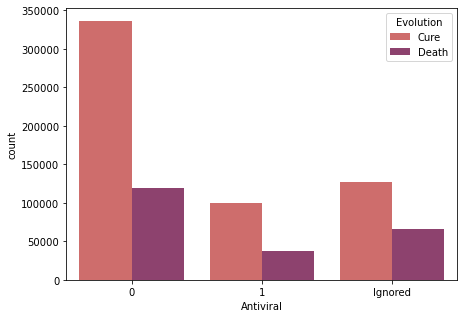

In [83]:
plt.figure(figsize = (7,5))
sns.countplot(x='Antiviral', hue='Evolution', data = df, palette='flare')
plt.show()

In [173]:
df_negative = df.loc[(df['PCR_Result'] == 'Not Detectable')] # creating a dataset with only the negatives
df_positive = df.loc[(df['PCR_Result'] == 'Detectable')] # creating a dataset with only the positives 

groups_neg = df_negative.groupby('Antiviral').Antiviral.agg(['count'])
groups_pos = df_positive.groupby('Antiviral').Antiviral.agg(['count'])

groups = pd.concat([groups_pos, groups_neg], axis = 1)
group_names = ['Positives', 'Negatives']
groups.columns = group_names

diference = groups['Negatives'] - groups['Positives']
groups['Diference'] = diference

ratio = groups['Positives'] / groups['Negatives']
groups['Ratio P/N'] = ratio

groups.tail()

,Positives,Negatives,Diference,Ratio P/N
Antiviral,,,,
0,267746,187730,-80016,1.426229
1,79698,56787,-22911,1.403455
Ignored,127049,65425,-61624,1.941903


In [174]:
df_negative = df.loc[(df['Evolution'] == 'Death')] # creating a dataset with only the negatives
df_positive = df.loc[(df['Evolution'] == 'Cure')] # creating a dataset with only the positives 

groups_neg = df_negative.groupby('Antiviral').Antiviral.agg(['count'])
groups_pos = df_positive.groupby('Antiviral').Antiviral.agg(['count'])

groups = pd.concat([groups_pos, groups_neg], axis = 1)
group_names = ['Positives', 'Negatives']
groups.columns = group_names

diference = groups['Negatives'] - groups['Positives']
groups['Diference'] = diference

ratio = groups['Positives'] / groups['Negatives']
groups['Ratio P/N'] = ratio

groups.tail()

,Positives,Negatives,Diference,Ratio P/N
Antiviral,,,,
0,336315,119161,-217154,2.822358
1,99630,36855,-62775,2.703297
Ignored,126811,65663,-61148,1.931240


> The ratio does not vary.  
The variable seams not very interesting

In [175]:
df.drop('Antiviral', axis=1, inplace=True)
df.drop('Antiviral_Type', axis=1, inplace=True)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784435 entries, 0 to 824230
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Notification_Date        784435 non-null  datetime64[ns]
 1   First_Symptom_Date       784435 non-null  datetime64[ns]
 2   State                    784435 non-null  object        
 3   Gender                   784435 non-null  object        
 4   Pregnancy                784435 non-null  object        
 5   Race                     784435 non-null  object        
 6   Schooling                784435 non-null  object        
 7   Fever                    784435 non-null  object        
 8   Cough                    784435 non-null  object        
 9   Sore_Throat              784435 non-null  object        
 10  Dyspnea                  784435 non-null  object        
 11  Respiratory_Discomfort   784435 non-null  object        
 12  Saturation      

# EDA using sweetviz

In [177]:
df.drop('Other_Morbidities', axis=1, inplace=True)
df.drop('ICU_Discharge_Date', axis=1, inplace=True)

In [89]:
#!pip install ipywidgets
#!pip install sweetviz
#jupyter nbextension enable --py widgetsnbextension

import sweetviz as sv
report = sv.analyze(df)
report.show_html('eda_report.html')
#report_comp = sv.compare(data1, data2)
report_comp.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


NameError: name 'report_comp' is not defined

In [178]:
df.to_csv(r'DataSUS_For_ML.csv', sep = ';', encoding='UTF-8', index=False)

In [ ]:
df